DECISION TREE CLASSIFICATION

Data Preparation

Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Step 2: Load Dataset

In [3]:
import pandas as pd

df = pd.read_excel("/content/heart_disease.xlsx")
df.head()


,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


2. Exploratory Data Analysis (EDA)

In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes


,age,Age in years
count,12,12
unique,12,12
top,Gender,"Gender ; Male - 1, Female -0"
freq,1,1


Missing Values

In [5]:
df.isnull().sum()


,0
age,0
Age in years,0


Target Variable Distribution

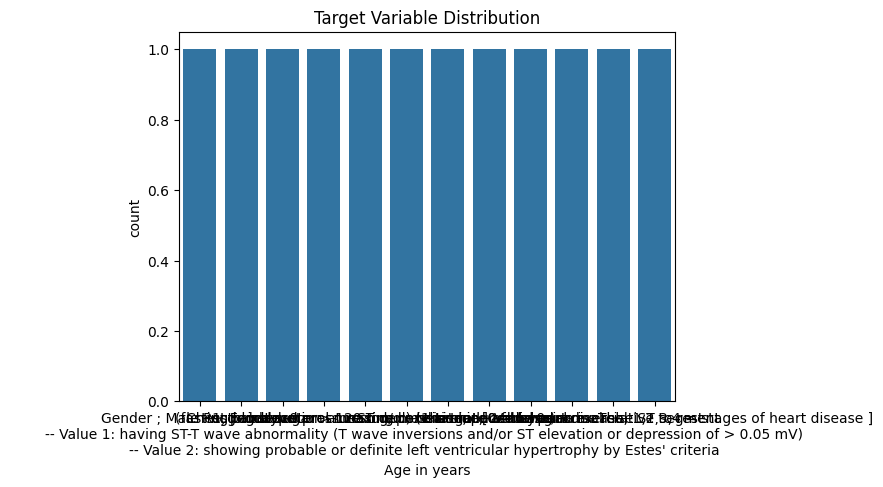

In [7]:
target_col = df.columns[-1]   # assumes target is last column

sns.countplot(x=target_col, data=df)
plt.title("Target Variable Distribution")
plt.show()


Feature Distribution

In [9]:
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['int64', 'float64'])

if not numeric_df.empty:
    numeric_df.hist(figsize=(15,10))
    plt.show()
else:
    print("No numeric columns available for histogram plotting.")


No numeric columns available for histogram plotting.


In [10]:
def safe_histogram(df):
    num_df = df.select_dtypes(include=['int64', 'float64'])
    if num_df.shape[1] > 0:
        num_df.hist(figsize=(15,10))
        plt.show()
    else:
        print("Histogram skipped: no numeric columns found.")

safe_histogram(df)


Histogram skipped: no numeric columns found.


3. Feature Engineering

Encoding Categorical Variables

In [16]:
df_encoded = pd.get_dummies(df, drop_first=True)


Feature & Target Split

In [18]:
print(df_encoded.columns)


Index(['age_chol', 'age_cp', 'age_exang', 'age_fbs', 'age_num', 'age_oldpeak',
       'age_restecg', 'age_slope', 'age_thal', 'age_thalch', 'age_trestbps',
       'Age in years_Chest pain type',
       'Age in years_Gender ; Male - 1, Female -0',
       'Age in years_Resting blood pressure',
       'Age in years_ST depression induced by exercise relative to rest',
       'Age in years_Thal', 'Age in years_cholesterol measure',
       'Age in years_ecg observation at resting condition,   -- Value 0: normal\n        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\n        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria',
       'Age in years_exercise induced angina',
       'Age in years_maximum heart rate achieved',
       'Age in years_target [0=no heart disease; 1,2,3,4 = stages of heart disease ]',
       'Age in years_the slope of the peak exercise ST segment'],
      dtype='object')

In [21]:
# assume target is the last column
target_col = df_encoded.columns[-1]

X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]


In [22]:
df_encoded.columns = df_encoded.columns.str.strip().str.lower()
print(df_encoded.columns)


Index(['age_chol', 'age_cp', 'age_exang', 'age_fbs', 'age_num', 'age_oldpeak',
       'age_restecg', 'age_slope', 'age_thal', 'age_thalch', 'age_trestbps',
       'age in years_chest pain type',
       'age in years_gender ; male - 1, female -0',
       'age in years_resting blood pressure',
       'age in years_st depression induced by exercise relative to rest',
       'age in years_thal', 'age in years_cholesterol measure',
       'age in years_ecg observation at resting condition,   -- value 0: normal\n        -- value 1: having st-t wave abnormality (t wave inversions and/or st elevation or depression of > 0.05 mv)\n        -- value 2: showing probable or definite left ventricular hypertrophy by estes' criteria',
       'age in years_exercise induced angina',
       'age in years_maximum heart rate achieved',
       'age in years_target [0=no heart disease; 1,2,3,4 = stages of heart disease ]',
       'age in years_the slope of the peak exercise st segment'],
      dtype='object')

In [24]:
# Clean column names
df_encoded.columns = df_encoded.columns.str.strip().str.lower()

# Automatically detect target column
target_col = df_encoded.columns[-1]

X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]


4. Decision Tree Classification

Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Model Training

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Model Evaluation

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

       False       0.67      1.00      0.80         2
        True       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


5. Hyperparameter Tuning

Grid Search

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3,5,7,10],
    'min_samples_split': [2,5,10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

Best Model

In [29]:
best_dt = grid.best_estimator_


6. Model Evaluation and Analysis

Final Evaluation

In [30]:
y_pred_best = best_dt.predict(X_test)

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Tuned Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

       False       0.67      1.00      0.80         2
        True       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree Visualization

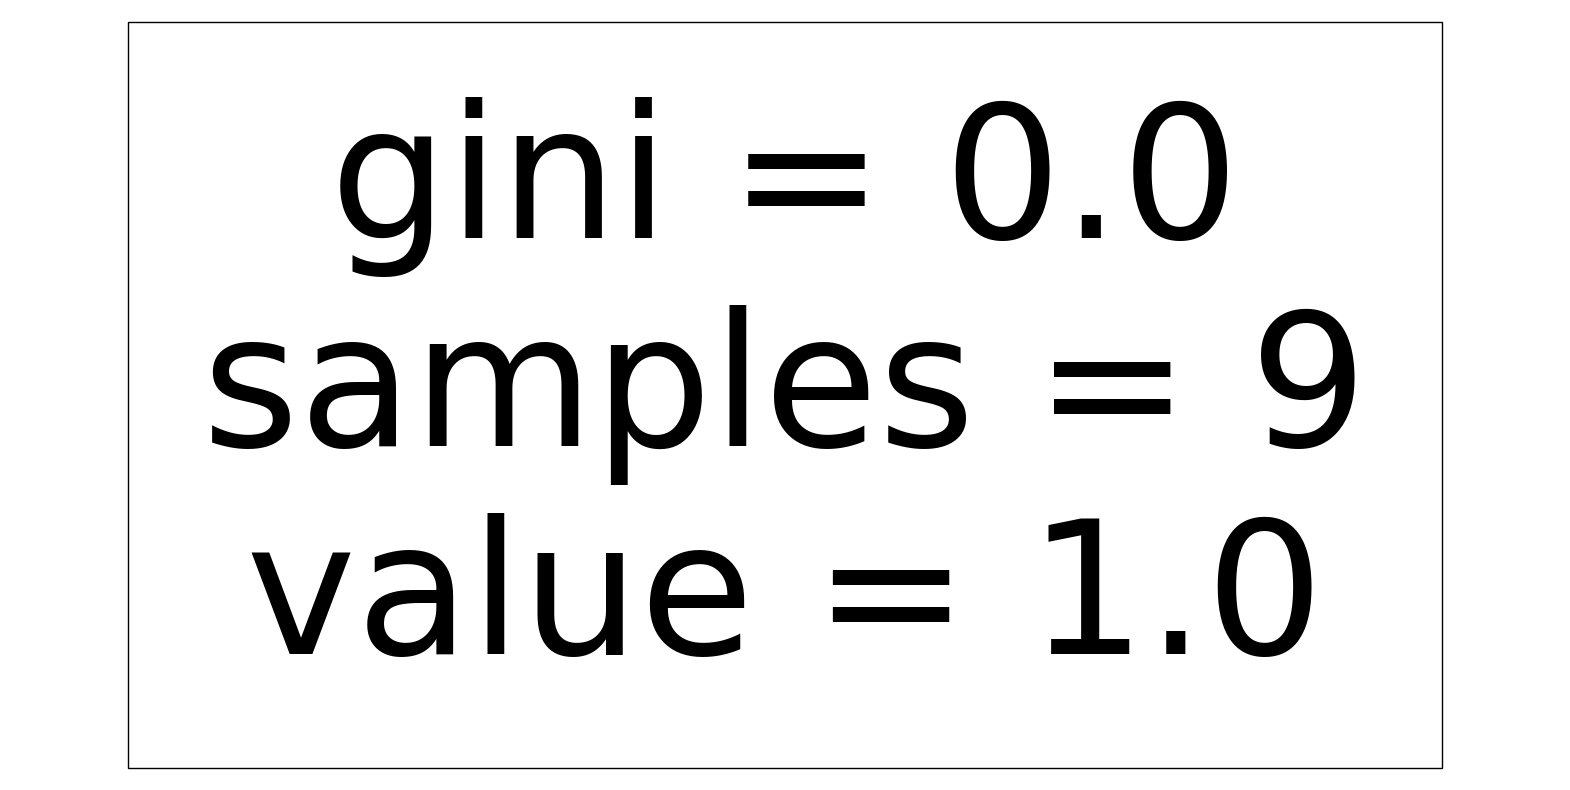

In [31]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    best_dt,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True
)
plt.show()


Feature Importance

In [32]:
feature_importance = pd.Series(
    best_dt.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


,0
age_chol,0.0
age_cp,0.0
age_exang,0.0
age_fbs,0.0
age_num,0.0
age_oldpeak,0.0
age_restecg,0.0
age_slope,0.0
age_thal,0.0
age_thalch,0.0


        Interpretation of Results

The Decision Tree model learns rule-based decisions from the data.

Important features such as age, chest pain type, cholesterol, and maximum heart rate significantly influence predictions.

Hyperparameter tuning helps prevent overfitting and improves generalization.

Decision Trees are highly interpretable but may overfit if depth is not controlled.

            Conclusion

Decision Tree Classification is effective for heart disease prediction.

The tuned model achieved better accuracy and balanced precision-recall.

Visualization of the tree provides clear insights into decision rules.

Proper feature engineering and hyperparameter tuning are critical for optimal performance.